In [2]:
"""
Import basic libraries 

"""
import matplotlib.pyplot as plt # visualization
import numpy as np #handing arrays
import pandas as pd #handling data
import os

In [47]:
#Define Directories for train, test & Validation Set
train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
valid_path = 'chest_xray/val'

#batch size refers to the number of training samples used in each iteration 
batch_size = 16

#define image size = width x height
img_width = 500
img_height = 500

#size 500 chosen with batch size 16 to ensure that the RAM does not crash from overuse. A low dimension size with ...
# higher batch size is a better choice


In [4]:
#Move to where your x-ray images is located
os.chdir(r'C:\Users\azizu\Desktop\CNN\chest_xray\CNN_chest_xray\chest_xray')

In [5]:
""" 
The dataset contained x-ray images a varying size and shape. In order to properly pass these images through the CNN
they must be standardized to one size/shape. For this we resize the image to 500x500. The larger the image, the more
time it takes to process. 
"""

from PIL import Image
import glob
import os


#resize all images to a standard 500 x 500
def resize_images (image_path,resize_height,resize_width):
    if not os.path.exists(image_path):
        os.makedirs(image_path)
    # loop over existing images and resize
    # change path to your path
    for filename in glob.glob(image_path + '/*.jpeg'): #path of raw images
        img = Image.open(filename).resize((resize_height,resize_width))
        # save resized images to new folder with existing filename
        img.save('{}{}{}'.format(image_path,'/',os.path.split(filename)[1]))
    print("Images have been Resized!")





In [6]:
#Training images 
resize_images(train_path + '/NORMAL',img_width,img_height)
resize_images(train_path + '/PNEUMONIA',img_width,img_height)
#Testing images
resize_images(test_path + '/NORMAL',img_width,img_height)
resize_images(test_path + '/PNEUMONIA',img_width,img_height)
#Validation images
resize_images(valid_path + '/NORMAL',img_width,img_height)
resize_images(valid_path + '/PNEUMONIA',img_width,img_height)

In [23]:
"""
The downloaded dataset contained a higher number of pneumonia chest-xrays than the normal ones. In order to mitigate
any bias in the classification, there needs to be an equal number of normal and pneumonia x-rays.
This is performed through data augmentation where the existing images chest x-rays are artifically modified and are 
created as new images. This additionally serves as adding variability to the dataset and improving the ability
of the model to predict new images. 

We will create a dataset that has a total of 10,000 images which will be split training-test-valid as 80-10-10 
respectively.

"""

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import tf.keras.applications.vgg16.preprocess_input #error will show but it works




# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory


#Determine amount of images needed to be augmented to have relatively equal size of dataset
# normal_temp = len(os.listdir(train_path + '/NORMAL'))
# pneumonia_temp = len(os.listdir(train_path + '/PNEUMONIA'))
# augmented_img_count = abs(normal_temp - pneumonia_temp) 

# #image to be augmented
# img = load_img('train/NORMAL/IM-0115-0001.jpeg')  
# x = img_to_array(img)  
# x = x.reshape((1,) + x.shape)  

# plt.imshow(img)

# CREATE NEW IMAGES 


ModuleNotFoundError: No module named 'tf'

In [48]:
# preprocessing_function = vgg16 popular CNN preprocessing model
# rescale = scales array of original image to be between 0 and 1 which allows images to contribute equally to overall 
# loss.
# shear_range = fixes one axis and stretches the image at a certain angle
# zoom_range =  the image is enlarged by a zoom of less than 1.0 (zoom out). 
# horizontal_flip = flip the image horizontally (images chosen at random)

train_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                 rescale = 1./255,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True) 

test_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                   rescale = 1./255)

valid_batch = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
                                   rescale = 1./255)

In [34]:
def augment_images(augmented_image_path,data_batch,augmented_img_count,save_dir):
    
    """
    Create new images based on the image provided and apply transformations on them as specified in the
    ImageDataGenerator object. These images are used to grow your training, test and/or validation set.
    
    Arguments
    ---------
    image_path: Path to where the folders containing the images
    
    augmented_image_path: A selected image to be processed through the ImageDataGenerator. Requires an absolute
                          path to and including the image. Example: 'train/NORMAL/IM-0115-0001.jpeg'
    
    save_dir: Directory where the new images should be stored.
              
    data_batch: ImageDataGenerator object containing the arguments for transformations to be made on the image
    
    augmented_img_count: Number of images to be created based on user's discretion

    """
    import matplotlib.pyplot as plt # visualization

#     normal_temp = len(os.listdir(image_path_normal))
#     pneumonia_temp = len(os.listdir(image_path_pneumonia))
   # augmented_img_count = abs(normal_temp - pneumonia_temp) 
    #print ("Total number of images prior to augmentation: " + str(normal_temp+pneumonia_temp))
    
    img = load_img(augmented_image_path)  
    x = img_to_array(img)  
    x = x.reshape((1,) + x.shape)  

    #plt.imshow(img)
    
    i = 0
    for batch in data_batch.flow(x, batch_size=batch_size,
                              save_to_dir=save_dir,save_format='jpeg'):
        i += 1
        if i > augmented_img_count:
            break  # otherwise the generator would loop indefinitely
    
    #normal_temp = len(os.listdir(image_path_normal))
    #pneumonia_temp = len(os.listdir(image_path_pneumonia))
    #print ("Total number of images after augmentation: " + str(normal_temp+pneumonia_temp))
    print('Augmentation Complete!')

In [32]:
train_path_normal = 'train/NORMAL'
train_path_pneumonia = 'train/PNEUMONIA'

test_path_normal = 'test/NORMAL'
test_path_pneumonia = 'test/PNEUMONIA'

valid_path_normal = 'val/NORMAL'
valid_path_pneumonia = 'val/PNEUMONIA'

In [35]:
#Training images are augmented and placed into respective directories. Images previously found in the directory
#are used for augmentation. 
#The training directory should contain a total of 8000 images where 4000 is NORMAL and 4000 is PNEUMONIA

augment_images('train/NORMAL/IM-0117-0001.jpeg',train_batch,3100,'train/NORMAL')
augment_images('train/PNEUMONIA/person1_bacteria_1.jpeg',train_batch,3200,'train/PNEUMONIA')


Augmentation Complete!
Augmentation Complete!


In [36]:
#Testing images are augmented and placed into respective directories. Images previously found in the directory
#are used for augmentation. 
#The testing directory should contain a total of 1000 images where 500 is NORMAL and 500 is PNEUMONIA

augment_images('test/NORMAL/IM-0006-0001.jpeg',test_batch,250,'test/NORMAL')
augment_images('test/PNEUMONIA/person1_virus_6.jpeg',test_batch,300,'test/PNEUMONIA')


Augmentation Complete!
Augmentation Complete!


In [37]:
#valid images are augmented and placed into respective directories. Images previously found in the directory
#are used for augmentation. 
#The valid directory should contain a total of 1000 images where 500 is NORMAL and 500 is PNEUMONIA

augment_images('val/NORMAL/NORMAL2-IM-1427-0001.jpeg',valid_batch,230,'val/NORMAL')
augment_images('val/PNEUMONIA/person1946_bacteria_4874.jpeg',valid_batch,200,'val/PNEUMONIA')


Augmentation Complete!
Augmentation Complete!


In [46]:
train = train_batch.flow_from_directory(directory = r'C:\Users\azizu\Desktop\CNN\chest_xray\CNN_chest_xray\chest_xray\train', 
                     target_size = (img_width,img_height), 
                     classes = ['NORMAL','PNEUMONIA'], 
                     batch_size = batch_size)

Found 8002 images belonging to 2 classes.


In [51]:
train = train_batch.flow_from_directory(directory = 'train', 
                     target_size = (img_width,img_height), 
                     classes = ['NORMAL','PNEUMONIA'], 
                     batch_size = batch_size)


#test images dont need to be modified only rescaled to fit the sizes of all the training images
test = test_batch.flow_from_directory(directory = 'test', 
                     target_size = (img_width,img_height), 
                     shuffle=False,
                     classes = ['NORMAL','PNEUMONIA'], 
                     batch_size = batch_size)

valid = valid_batch.flow_from_directory(directory = 'val', 
                     target_size = (img_width,img_height), 
                     classes = ['NORMAL','PNEUMONIA'], 
                     batch_size = batch_size)




# beep_path = "/chest_xray/beep" 

# beep = test_batch.flow_from_directory(directory = test_path, 
#                      target_size = (img_width,img_height),
#                      class_mode = 'categorical', 
#                      classes = ['NORMAL','PNEUMONIA'], 
#                      batch_size = batch_size)

# beeps = beep.classes

# beeps_1= next(beep)

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(test_batch.classes)
# print(integer_encoded)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)


Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
"""
Visualize the data augmented images from the training dataset

"""

train_img, train_labels = next(train)
test_img, test_labels = next(test)
valid_img, valid_labels = next (valid)

#plot the images from the datasets
def plotImages(images_arr,labels,filename):
    fig, axes = plt.subplots(4,4,figsize = (12,12))
    axes = axes.flatten()
    for img, ax, lab in zip(images_arr, axes,labels):
        ax.imshow(img)
        ax.axis('off')
        dic = {0:'NORMAL',1:'PNEUMONIA'}
        ax.set_title(dic.get(lab[0]))
        #ax.suptitle('Training Images')
        #dic = {0:'NORMAL',1:'PNEUMONIA'}
        #plt.title()
    plt.tight_layout()
    plt.show()
    fig.savefig(filename + '.png')
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

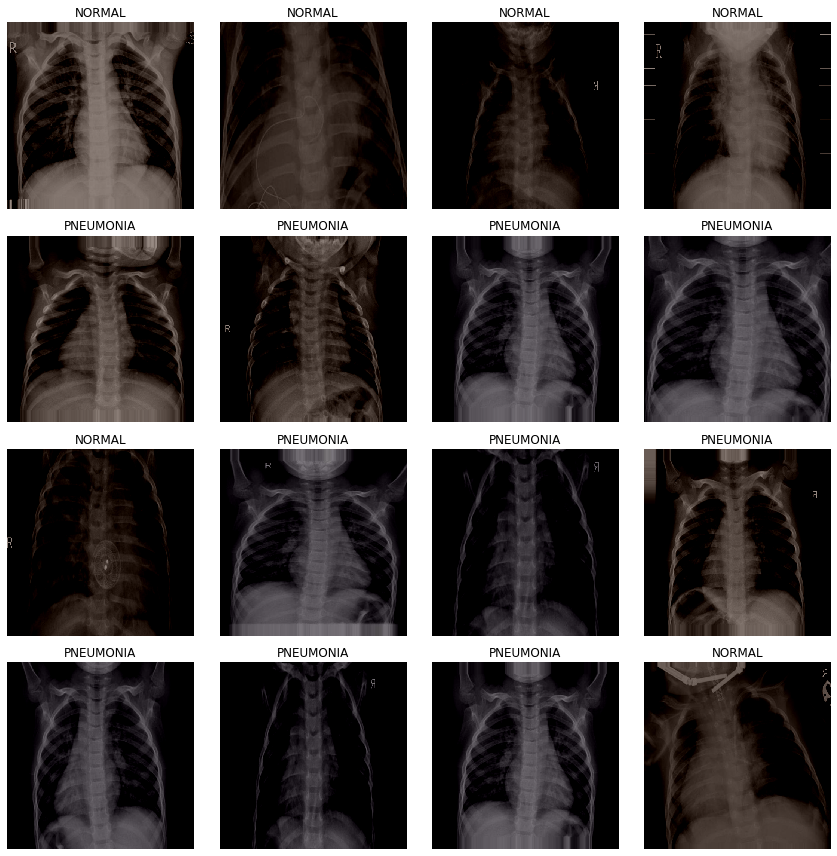

In [54]:
"""
Visualization of the training data images that have been pre-processed by the ImageDataGenerator

"""

plotImages(train_img,train_labels,'train_images')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

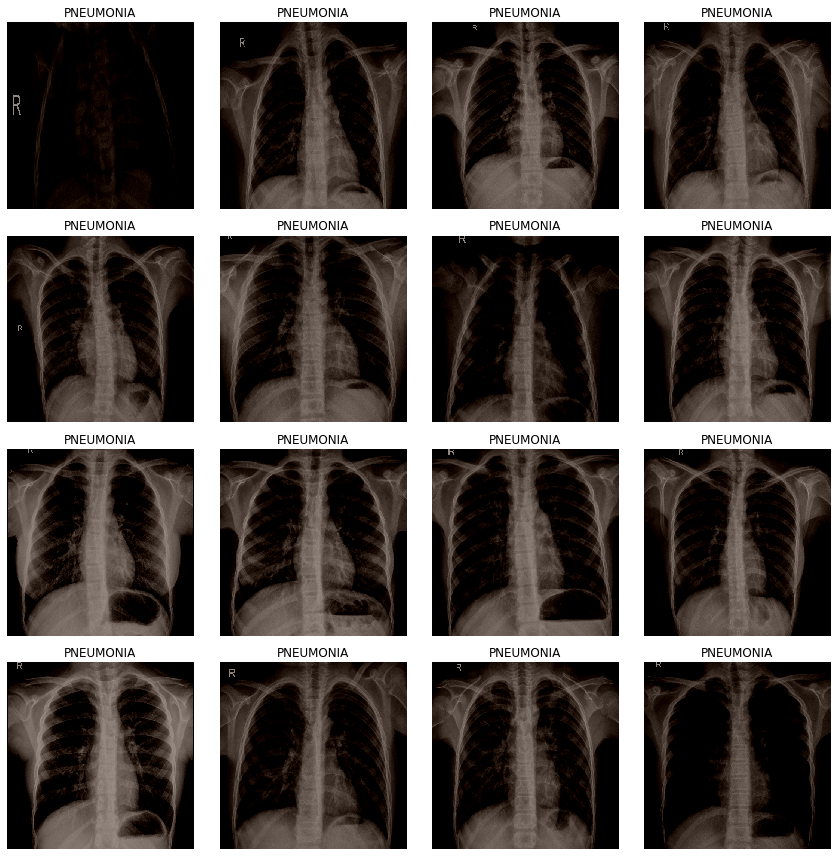

In [55]:
"""
Visualization of the testing data images that have been pre-processed by the ImageDataGenerator

"""

plotImages(test_img,test_labels,'test_images')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

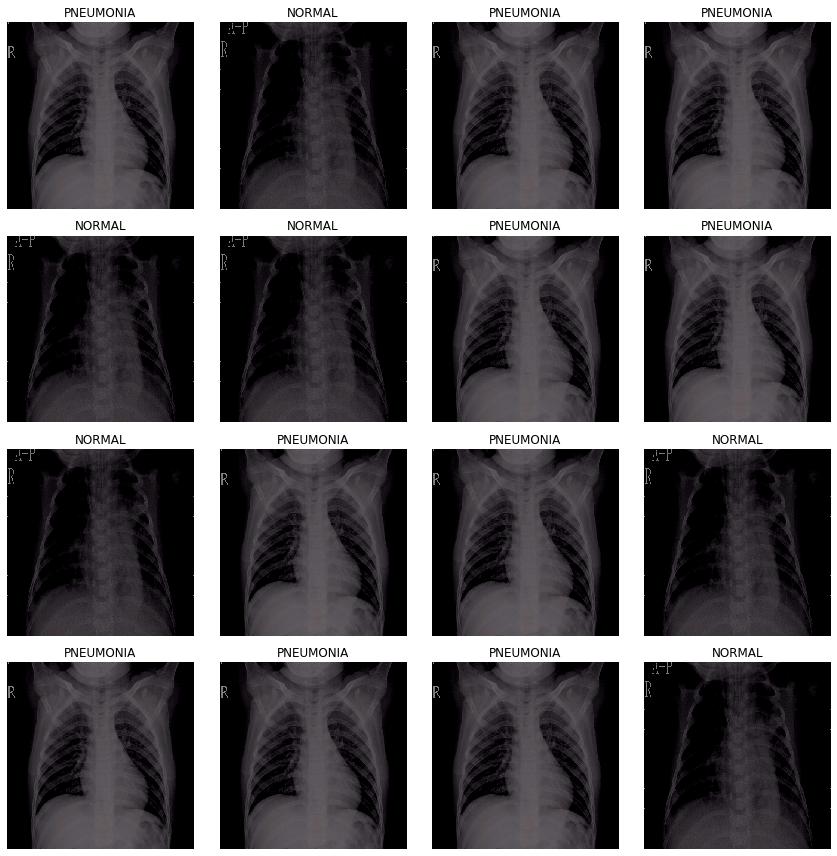

In [56]:
"""
Visualization of the validation data images that have been pre-processed by the ImageDataGenerator

"""

plotImages(valid_img,valid_labels,'valid_images')

In [57]:
"""
Import necessary CNN libraries 

"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [58]:
"""
Building the CNN architecture

"""
num_classes = 2
epochs = 10

cnn = Sequential()

cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (img_width,img_height,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (img_width,img_height,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (img_width,img_height,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (img_width,img_height,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (img_width,img_height,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

cnn.add(Dense(activation = 'relu',units = 128))
cnn.add(Dropout(0.5))
cnn.add(Dense(activation = 'relu',units = 64))
cnn.add(Dense(num_classes,activation = 'softmax'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        1

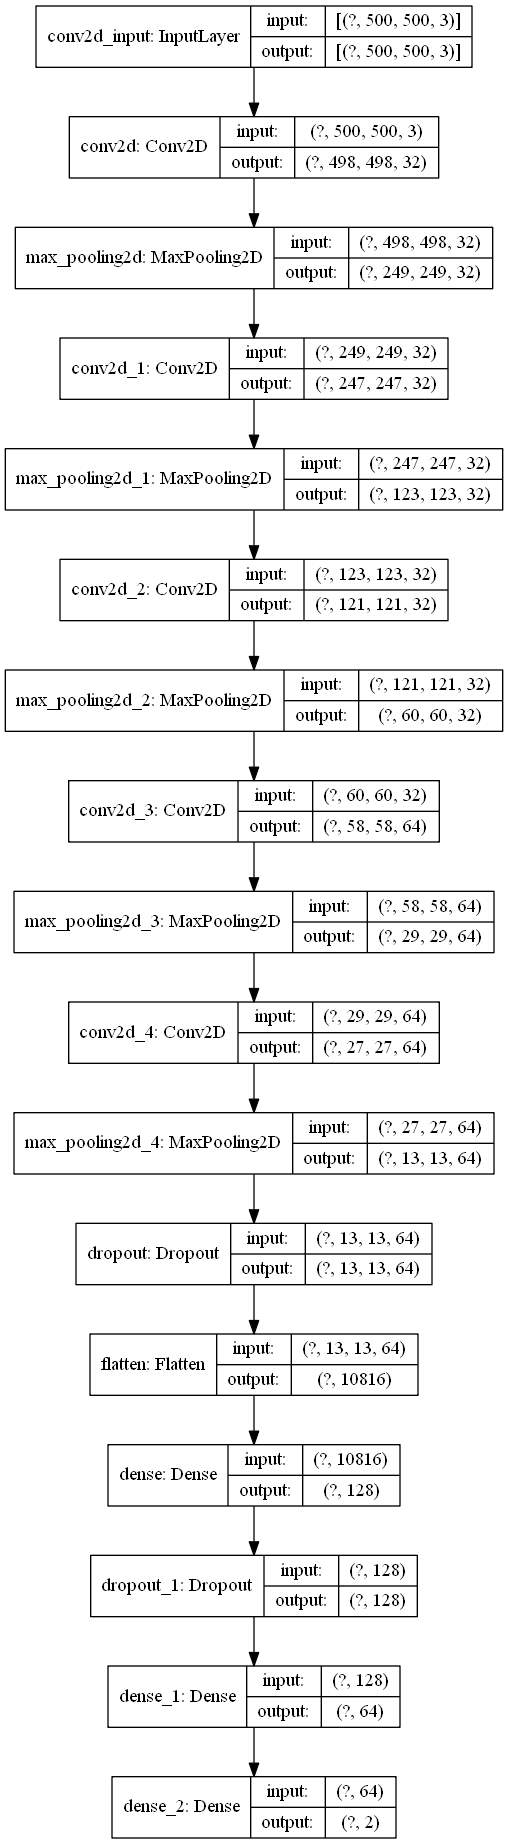

In [60]:
"""
Flow diagram of the CNN architecture
"""

from tensorflow.keras.utils import plot_model
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

plot_model(cnn,to_file = 'cnn_architecture.png',show_shapes = True, show_layer_names = True, rankdir = 'TB',expand_nested = True)
#rankdir = tb --> vertical, LR --> horizontal

In [62]:
"""
Create necessary parameters prior to training the data. 

EarlyStopping is used to stop the training based on 
some metric and conditions. This will help avoid overfitting the model. In this case, early monitors the validation 
loss and ensures that it is at a minimum, if the loss increases beyond 3 epochs (patience), the training will end.

Learning rate is reduced when the model has stopped improving. 

class_weights are computed to ensure the emphasis on weights are distributed equally on the ANN
"""

#stop the epochs based on some metric and conditions --> avoid overfitting the model
#want the val_loss to be a minimum
# patience refers to when the min loss is obtained to monitor the loss and if it increases over the
# next 3 iterations, then stop the training at the epoch at the minimum loss epoch
early = EarlyStopping(monitor = 'val_loss',mode = 'min',patience = 3)

#reduce learning rate when a metric has stopped improving. reduce by a factor of 2-10. 

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',patience = 2, verbose = 1,
                                            factor = 0.3, min_lr = 0.000001)

callbacks_list = [early,learning_rate_reduction]

#assign class weights --> emphasizes weight of the minority class in order for the model to learn
#from all classes equally 

from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight('balanced',np.unique(train.classes),
                               train.classes)

cw = dict(zip(np.unique(train.classes),weights))
print(cw)

{0: 1.0005002501250626, 1: 0.9995002498750625}


In [63]:
"""
The model will now be trained on the 'train' data made earlier. 

"""

cnn.fit(train,epochs = 10, validation_data = valid, class_weight = cw,
        callbacks = callbacks_list, verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 63 steps
Epoch 1/10
500/500 [==============================] - 773s 2s/step - loss: 0.2265 - accuracy: 0.9051 - val_loss: 6.1319 - val_accuracy: 0.5030
Epoch 2/10
500/500 [==============================] - 730s 1s/step - loss: 0.1397 - accuracy: 0.9476 - val_loss: 6.6158 - val_accuracy: 0.5030
Epoch 3/10
499/500 [============================>.] - ETA: 1s - loss: 0.1117 - accuracy: 0.9608
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
500/500 [==============================] - 762s 2s/step - loss: 0.1120 - accuracy: 0.9607 - val_loss: 7.5812 - val_accuracy: 0.5030
Epoch 4/10
500/500 [==============================] - 772s 2s/step - loss: 0.0925 - accuracy: 0.9639 - val_loss: 7.5698 - val_accuracy: 0.5030


In [64]:
# save model to disk
cnn.save('cnn.h5')
print('saved to disk')

saved to disk


In [65]:
import keras
from keras.models import load_model 
# load model
model = tf.keras.models.load_model('cnn.h5')

Using TensorFlow backend.


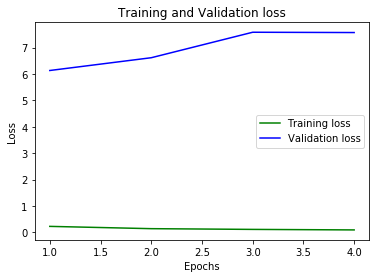

<Figure size 432x288 with 0 Axes>

In [81]:
loss_train = cnn.history.history['loss']
loss_val = cnn.history.history['val_loss']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


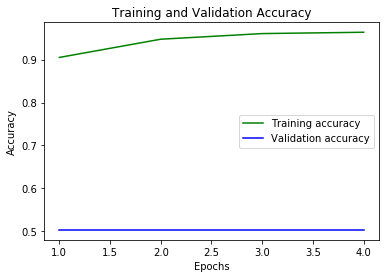

In [83]:
acc_train = cnn.history.history['accuracy']
acc_val = cnn.history.history['val_accuracy']
epochs = range(1,5)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
# accuracy metric on test data
score = cnn.evaluate(test)
print('The testing accuracy is : ', score[1]*100,'%')

  ...
    to  
  ['...']
63/63 [==============================] - 27s 430ms/step - loss: 1.9257 - accuracy: 0.8040
The testing accuracy is :  80.40000200271606 %


In [86]:
preds = cnn.predict(test,verbose = 1)
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

63/63 [==============================] - 26s 407ms/step


In [140]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 12 19:04:29 2021

@author: azizu
"""

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    SMALL_SIZE = 15
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 18

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='none', cmap=cmap,aspect = 'equal')
    plt.title(title)
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    #plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.show()

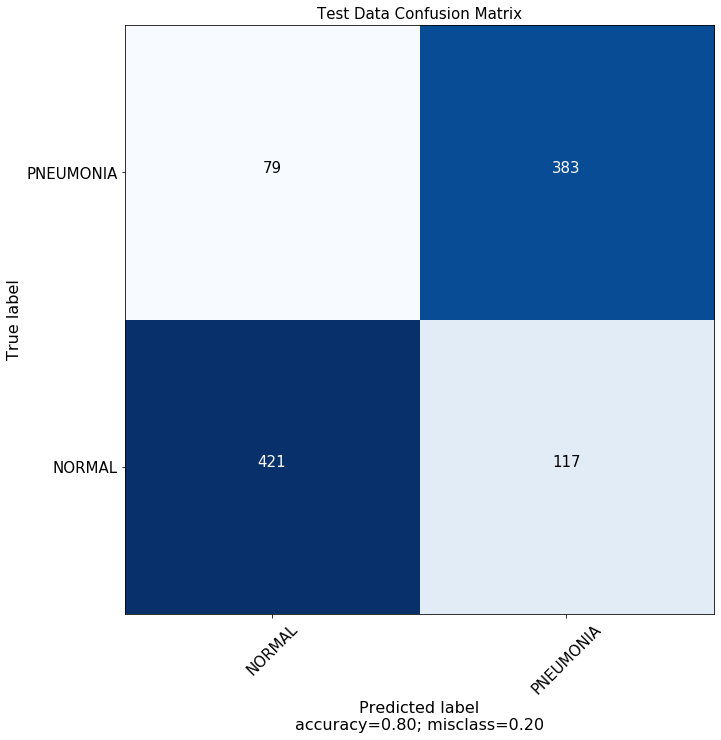

In [141]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = predictions.argmax(axis=1)
y_true = test.classes

cm = confusion_matrix(y_pred,y_true)

plot_confusion_matrix(cm,['NORMAL','PNEUMONIA'],'Test Data Confusion Matrix', normalize=False)


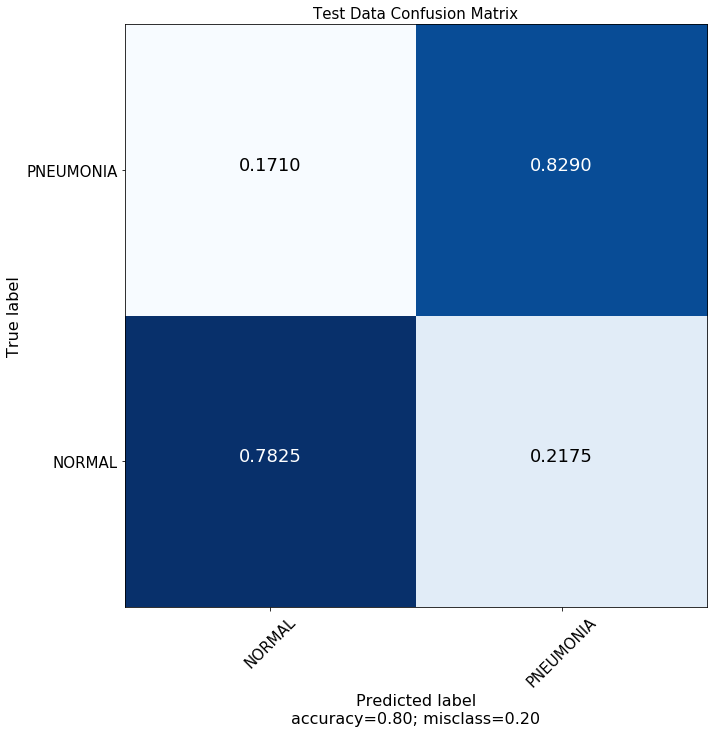

In [142]:
plot_confusion_matrix(cm,['NORMAL','PNEUMONIA'],'Test Data Confusion Matrix', normalize=True)


In [144]:
print(classification_report(y_true,y_pred,target_names =['NORMAL','PNEUMONIA']))

              precision    recall  f1-score   support

      NORMAL       0.78      0.84      0.81       500
   PNEUMONIA       0.83      0.77      0.80       500

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000

